In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../data/Heart.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [2]:
df.dropna(inplace=True)

In [3]:
# sns.pairplot(df, hue='AHD')

<Axes: xlabel='AHD', ylabel='count'>

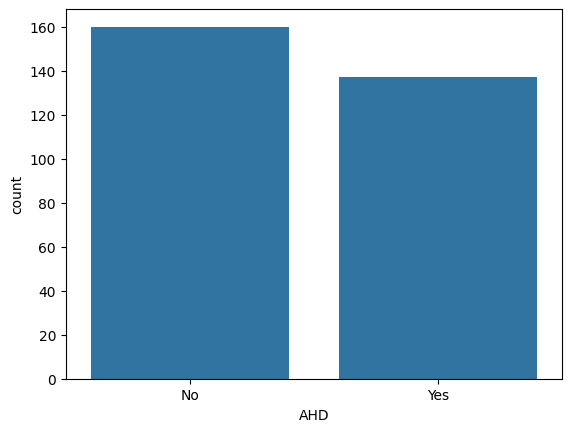

In [4]:
sns.countplot(x='AHD', data=df)

In [5]:
df['AHD'] = pd.get_dummies(df['AHD'], drop_first=True, dtype=int)
df = pd.get_dummies(df, dtype=int)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,0,1,0,0,1,0


In [6]:
from sklearn.model_selection import train_test_split

X, y = df.drop('AHD', axis=1), df['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        46
           1       0.83      0.77      0.80        44

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



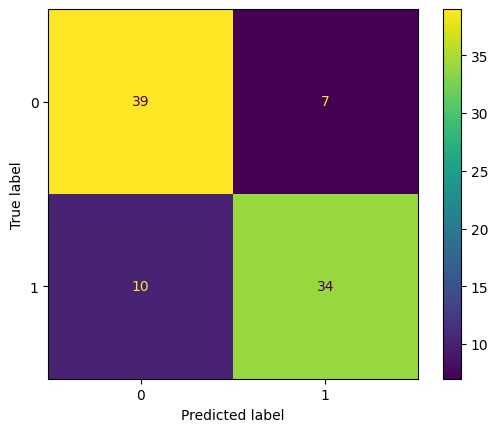

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(RandomForestClassifier())

params = {
        'randomforestclassifier__n_estimators': range(80, 200, 10),
        'randomforestclassifier__max_depth': [1,2,5],
        }

clf = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy') # accuracy, recall, precision, f1

clf.fit(X_train, y_train)

print(clf.best_params_)

{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 180}


              precision    recall  f1-score   support

           0       0.80      0.89      0.85        46
           1       0.87      0.77      0.82        44

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



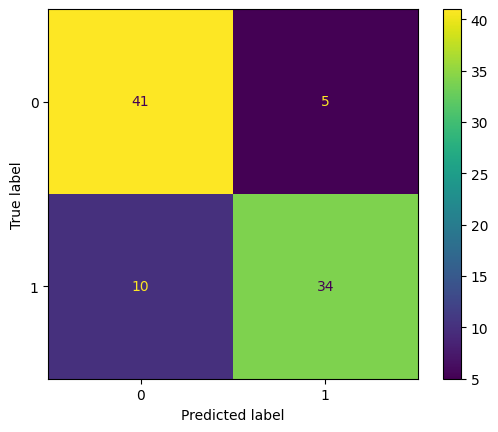

In [9]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()